IMPORTING LIBRARIES

In [93]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

READ CSV FILE

In [94]:
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1073,1.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,153.0,93.0,29.34,103.0,88.0,0.0
1,953,0.0,39.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,170.0,137.5,77.5,27.35,67.0,70.0,0.0
2,2584,0.0,43.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,256.0,129.0,86.0,25.89,96.0,72.0,0.0
3,3068,0.0,46.0,3.0,1.0,30.0,0.0,0.0,0.0,0.0,196.0,114.0,75.0,21.01,60.0,69.0,0.0
4,1826,0.0,38.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,102.5,60.0,22.58,60.0,57.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,1033,0.0,44.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,187.0,122.0,83.0,30.40,85.0,75.0,0.0
3642,3264,0.0,51.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,261.0,127.0,81.0,20.24,75.0,96.0,0.0
3643,1653,1.0,39.0,3.0,1.0,20.0,0.0,0.0,0.0,0.0,148.0,101.0,62.0,24.47,70.0,81.0,0.0
3644,2607,0.0,57.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,382.0,133.0,77.0,24.27,75.0,81.0,0.0


INFO OF DATASET

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3646 non-null   int64  
 1   male             3646 non-null   float64
 2   age              3646 non-null   float64
 3   education        3646 non-null   float64
 4   currentSmoker    3646 non-null   float64
 5   cigsPerDay       3646 non-null   float64
 6   BPMeds           3646 non-null   float64
 7   prevalentStroke  3646 non-null   float64
 8   prevalentHyp     3646 non-null   float64
 9   diabetes         3646 non-null   float64
 10  totChol          3646 non-null   float64
 11  sysBP            3646 non-null   float64
 12  diaBP            3646 non-null   float64
 13  BMI              3646 non-null   float64
 14  heartRate        3646 non-null   float64
 15  glucose          3646 non-null   float64
 16  TenYearCHD       3646 non-null   float64
dtypes: float64(16)

CHECKING NULL VALUES

In [96]:
df.isnull().sum()

Unnamed: 0         0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

VISUALISATION OF DATASET

<Axes: >

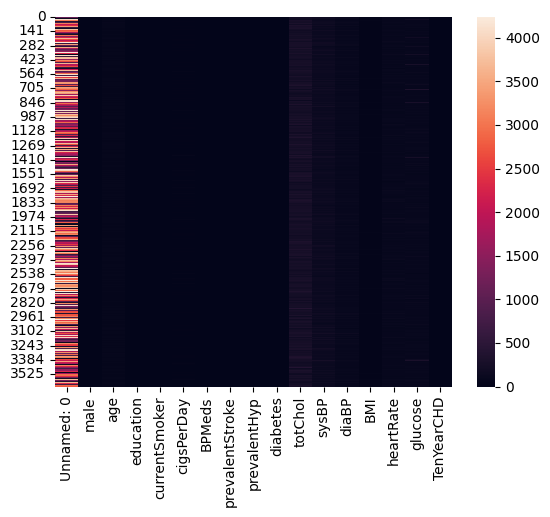

In [97]:
sns.heatmap(df)

DROP COLUMN

In [98]:
df = df.drop(columns="Unnamed: 0")

In [99]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,153.0,93.0,29.34,103.0,88.0,0.0
1,0.0,39.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,170.0,137.5,77.5,27.35,67.0,70.0,0.0
2,0.0,43.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,256.0,129.0,86.0,25.89,96.0,72.0,0.0
3,0.0,46.0,3.0,1.0,30.0,0.0,0.0,0.0,0.0,196.0,114.0,75.0,21.01,60.0,69.0,0.0
4,0.0,38.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,102.5,60.0,22.58,60.0,57.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,0.0,44.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,187.0,122.0,83.0,30.40,85.0,75.0,0.0
3642,0.0,51.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,261.0,127.0,81.0,20.24,75.0,96.0,0.0
3643,1.0,39.0,3.0,1.0,20.0,0.0,0.0,0.0,0.0,148.0,101.0,62.0,24.47,70.0,81.0,0.0
3644,0.0,57.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,382.0,133.0,77.0,24.27,75.0,81.0,0.0


SPLIT INPUT OUTPUT COLUMNS

In [100]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=64)

USING LOGISTIC REGRESSION

In [102]:
lr = LogisticRegression()

In [103]:
lr.fit(x_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
predict = lr.predict(x_test)

In [105]:
accuracy_score(y_test,predict)

0.8397260273972603

In [ ]:
DECISSION TREE CLASSIFIER

In [106]:
dtr = DecisionTreeClassifier()

In [107]:
dtr.fit(x_train,y_train)

DecisionTreeClassifier()

In [109]:
dtrpredict = dtr.predict(x_test)

In [110]:
accuracy_score(y_test,dtrpredict)

0.7273972602739726

RANDOM FOREST CLASSIFIER 

In [111]:
rfc = RandomForestClassifier()

In [112]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
rfcpredict = rfc.predict(x_test)

In [115]:
accuracy_score(y_test,rfcpredict)

0.8383561643835616